Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Zhongzhi Zhang"
COLLABORATORS = ""

---

# Stability of algorithms

We say that an algorithm is stable if it computes almost the right solution to almost the right problem.
As an example, we consider computing $f(x) = e^x$ via its Taylor series,
$$ e^x = 1 + x + x^2/2 + x^3/3! + \dotsb .$$
Consider this implementation

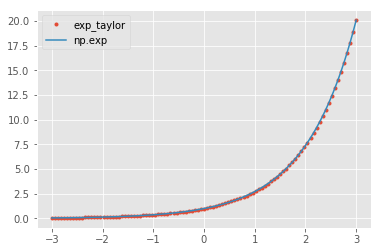

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

# This "decorator" makes this function apply pointwise to an array
@np.vectorize
def exp_taylor(x):
    sum = 0
    term = 1
    i = 1
    # Why does this loop terminate?
    while sum + term != sum:
        sum += term
        term *= x / i
        i += 1
    return sum

X = np.linspace(-3, 3, 101)
plt.plot(X, exp_taylor(X), '.', label='exp_taylor')
plt.plot(X, np.exp(X), label='np.exp')
plt.legend();

## Conditioning

The first thing to evaluate is whether the problem our algorithm is solving is well conditioned.
The (relative) condition number is defined as
$$ \kappa = |f'(x)| \frac{|x|}{|f(x)|} . $$
Write a function that evaluates the condition number of $f(x) = e^x$ at its input $x$.  You may call `np.exp`.

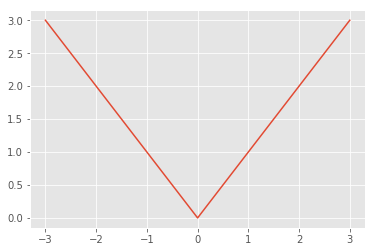

In [3]:
def cond_exp(x):
    """Compute the relative condition number of exp(x)"""
    # YOUR CODE HERE
    return np.abs(x)
    raise NotImplementedError()
    
X = np.linspace(-3, 3, 101)
plt.plot(X, cond_exp(X));

In [4]:
assert np.isclose(cond_exp(-20), 20)
assert np.isclose(cond_exp(20), 20)
print('Tests pass')

Tests pass


## Stability

This algorithm is stable for large values of $x$, but what happens for negative values of $x$?

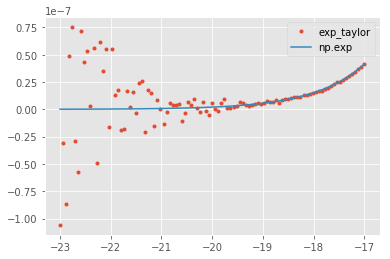

In [5]:
X = np.linspace(-23, -17, 101)
plt.plot(X, exp_taylor(X), '.', label='exp_taylor')
plt.plot(X, np.exp(X), label='np.exp')
plt.legend();

Use the identity
$$e^{-x} = \frac{1}{e^x} $$
and `exp_taylor` to compute accurate values of $e^x$ for both positive and negative $x$.

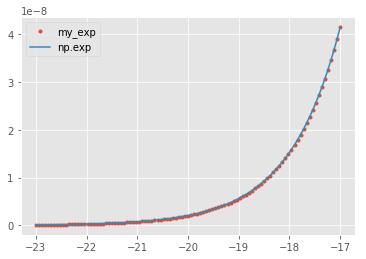

In [6]:
@np.vectorize
def my_exp(x):
    """Use exp_taylor and the identity above to evaluate exp(x)."""
    # YOUR CODE HERE
    if x<0:
        x = -x
        negative = 1
    else:
        negative = 0
    sum = 0
    term = 1
    i = 1
    # Why does this loop terminate?
    while sum + term != sum:
        sum += term
        term *= x / i
        i += 1
    if negative == 1:
        return 1/sum
    else:
        return sum
    raise NotImplementedError()
    
X = np.linspace(-23, -17, 101)
plt.plot(X, my_exp(X), '.', label='my_exp')
plt.plot(X, np.exp(X), label='np.exp')
plt.legend();

In [7]:
X = np.linspace(-30, 30)
assert np.allclose(my_exp(X), np.exp(X))
print('Tests pass')

Tests pass


# Why

To see why `exp_taylor(x)` is unstable for large negative $x$, we can look at the terms in the Taylor series.

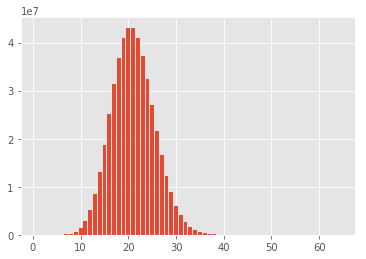

In [8]:
def taylor_terms(x):
    term = 1
    i = 1
    termno = [i]
    terms = [term]
    while np.abs(term) > 1e-5:
        term *= x / i
        i += 1
        terms.append(term)
        termno.append(i)
    return termno, terms

plt.bar(*taylor_terms(20));

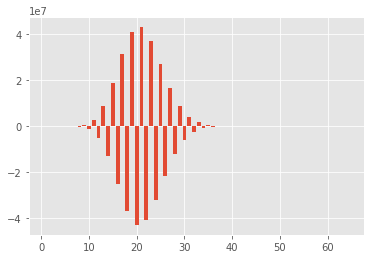

In [9]:
plt.bar(*taylor_terms(-20));

For negative $x$, the series is alternating.  When $x$ is a large negative number, we sum many large magnitude terms to produce an output very close to zero.  Recalling the formula for condition number,
$$ \kappa = |f'(x)| \frac{|x|}{|f(x)|}, $$
there must be **intermediate** operations with large condition number.

**Essence of instability: some intermediate operation in the numerical algorithm must be ill conditioned.**